In [106]:
import pandas as pd
import matplotlib.colors as mcl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Imports de mapas
import geopandas as gpd

# Opções gerais necessárias:
pd.options.display.float_format = "{:,.2f}".format

In [107]:
# Criando indices dos sexos:
sexo = {1: 'Masc.', 2: 'Fem.'}

# Criando indices das raças:
#escol = {5: 'Fundamental Completo', 7: 'Médio Completo', 9: 'Superior Completo', 10: 'Mestrado', 11: 'Doutorado'}

# Variável com o nível de confiança a ser considerado e utilizado:
nivel_confianca = 0.01

# Montagem da paleta de cores utilizadas:
pal = sns.color_palette("pastel")

# Definição das cores para cada sexo (masc: verde pastel, fem: laranja pastel)
color_masc = pal[2]
color_fem = pal[1]

xlim_total_esquerda = -73.98318216
xlim_total_direita = -34.79331171

In [108]:
#Leitura da tabela de dados gerais:
RAIS_GERAL_2022 = pd.read_csv("C:/Users/victo/2022/estagio/estagio/data/raw/DATA_RAIS_GERAL_2022.csv", sep = ";", encoding = 'utf-8', skipinitialspace = True)

# Renomeando as colunas:
RAIS_GERAL_2022.rename(columns = {'CBO Ocupação 2002':'CBO', 'CNAE 2.0 Classe':'CNAE', 'Escolaridade após 2005':'Escolaridade',
                            'Raça Cor':'Raça', 'Vl Remun Dezembro Nom':'Remuneração', 'Sexo Trabalhador':'Sexo'}, inplace = True)

In [109]:
# Leitura do mapa do Brasil para utilização:
df_br_map = gpd.read_file("C:/Users/victo/2022/estagio/estagio/data/shapefiles/lml_unidade_federacao_a.shp")


# Criação da coluna centroid, com o centro de cada polígono (Estado)
df_br_map['centroid'] = df_br_map.centroid

C:\Users\victo\AppData\Local\Temp\ipykernel_29564\954660324.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_br_map['centroid'] = df_br_map.centroid


In [110]:
'''UF = pd.Series.to_frame(RAIS_GERAL_2022['UF'].value_counts())
UF['qnt_total'] = UF['UF'].astype(object)
del UF['UF']
UF['sigla'] = UF.index
df_br_map = df_br_map.merge(UF, how = 'inner', on = 'sigla')

map_fig = df_br_map.plot(figsize = (16,16))
map_fig.set_axis_off()

df_br_map.apply(lambda x: map_fig.annotate(text=x['qnt_total'], xy=(x['centroid'].coords[0][0],x['centroid'].coords[0][1]), ha='center', bbox = dict(boxstyle="round,pad=.5", fc="0.9")), axis=1)
map_fig'''

'UF = pd.Series.to_frame(RAIS_GERAL_2022[\'UF\'].value_counts())\nUF[\'qnt_total\'] = UF[\'UF\'].astype(object)\ndel UF[\'UF\']\nUF[\'sigla\'] = UF.index\ndf_br_map = df_br_map.merge(UF, how = \'inner\', on = \'sigla\')\n\nmap_fig = df_br_map.plot(figsize = (16,16))\nmap_fig.set_axis_off()\n\ndf_br_map.apply(lambda x: map_fig.annotate(text=x[\'qnt_total\'], xy=(x[\'centroid\'].coords[0][0],x[\'centroid\'].coords[0][1]), ha=\'center\', bbox = dict(boxstyle="round,pad=.5", fc="0.9")), axis=1)\nmap_fig'

In [111]:
# Foi utilizado o Índice Nacional de Preços ao Consumidor (INPC - IBGE).

# Índice de correção de inflação para o período de 12/2022
fator_correcao_inflacao_2022 = 1.06951750

RAIS_GERAL_2022["Remuneração"] = RAIS_GERAL_2022["Remuneração"] * fator_correcao_inflacao_2022

In [112]:
# Exibindo os cinco primeiros dados da tabela:
RAIS_GERAL_2022.head()

,UF,CBO,CNAE,Escolaridade,Idade,Raça,Remuneração,Sexo
0,MS,317110,82997,1,42,8,"2,363.73",1
1,MS,212420,47113,1,30,2,"3,385.09",1
2,MS,212415,47440,3,38,8,"5,347.59",1
3,MS,212315,38114,4,57,8,"6,135.89",1
4,MS,212315,38114,4,40,8,"3,831.76",1


In [113]:
# Tabela principal para quantidade:
RAIS_GERAL_2022_QNT = pd.crosstab(RAIS_GERAL_2022["UF"], RAIS_GERAL_2022["Sexo"].replace(sexo))
RAIS_GERAL_2022_QNT.reset_index(inplace = True)
RAIS_GERAL_2022_QNT.rename(columns = {'UF':'sigla','Fem.':'qnt_mulheres_2022', 'Masc.':'qnt_homens_2022'}, inplace = True)

RAIS_GERAL_2022_QNT.insert(2, "perc_mulheres_2022", RAIS_GERAL_2022_QNT["qnt_mulheres_2022"] / (RAIS_GERAL_2022_QNT["qnt_mulheres_2022"].sum()) * 100)
RAIS_GERAL_2022_QNT.insert(4, "perc_homens_2022", RAIS_GERAL_2022_QNT["qnt_homens_2022"] / (RAIS_GERAL_2022_QNT["qnt_homens_2022"].sum()) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2022_QNT, how = 'inner', on = 'sigla')

In [114]:
'''print(df_br_map.head())
print(RAIS_GERAL_2022_QNT.head())'''

'print(df_br_map.head())\nprint(RAIS_GERAL_2022_QNT.head())'

In [115]:
# Tabela principal para média e diferença salarial:
RAIS_GERAL_2022_MEDIA = pd.crosstab(RAIS_GERAL_2022["UF"], RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'mean')
RAIS_GERAL_2022_MEDIA.reset_index(inplace = True)
RAIS_GERAL_2022_MEDIA.rename(columns = {'UF':'sigla','Fem.':'salario_medio_mulheres_2022', 'Masc.':'salario_medio_homens_2022'}, inplace = True)
RAIS_GERAL_2022_MEDIA.insert(3, "dif_salarial_media_2022", ((RAIS_GERAL_2022_MEDIA["salario_medio_mulheres_2022"] - RAIS_GERAL_2022_MEDIA["salario_medio_homens_2022"]) / RAIS_GERAL_2022_MEDIA["salario_medio_homens_2022"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2022_MEDIA, how = 'inner', on = 'sigla')

In [116]:
# Tabela principal para mediana e diferença salarial:
RAIS_GERAL_2022_MEDIANA = pd.crosstab(RAIS_GERAL_2022["UF"], RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'median')
RAIS_GERAL_2022_MEDIANA.reset_index(inplace = True)
RAIS_GERAL_2022_MEDIANA.rename(columns = {'UF':'sigla','Fem.':'salario_mediano_mulheres_2022', 'Masc.':'salario_mediano_homens_2022'}, inplace = True)
RAIS_GERAL_2022_MEDIANA.insert(3, "dif_salarial_mediano_2022", ((RAIS_GERAL_2022_MEDIANA["salario_mediano_mulheres_2022"] - RAIS_GERAL_2022_MEDIANA["salario_mediano_homens_2022"]) / RAIS_GERAL_2022_MEDIANA["salario_mediano_homens_2022"]) * 100)
df_br_map = df_br_map.merge(RAIS_GERAL_2022_MEDIANA, how = 'inner', on = 'sigla')

In [117]:
# Tabela principal para quantidade:
RAIS_GERAL_2022_PERC = pd.crosstab(RAIS_GERAL_2022["UF"], RAIS_GERAL_2022["Sexo"].replace(sexo))

RAIS_GERAL_2022_PERC.insert(2, "% Mulheres 2022", RAIS_GERAL_2022_PERC["Fem."] / (RAIS_GERAL_2022_PERC["Fem."] + RAIS_GERAL_2022_PERC["Masc."]) * 100)
RAIS_GERAL_2022_PERC.insert(3, "% Homens 2022", RAIS_GERAL_2022_PERC["Masc."] / (RAIS_GERAL_2022_PERC["Fem."] + RAIS_GERAL_2022_PERC["Masc."]) * 100)
RAIS_GERAL_2022_PERC.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2022_PERC.drop('Masc.', inplace=True, axis=1)

RAIS_GERAL_2022_PERC

Sexo,% Mulheres 2022,% Homens 2022
UF,,
AC,14.90,85.10
AL,14.10,85.90
AM,17.48,82.52
AP,15.49,84.51
BA,18.91,81.09
CE,21.75,78.25
DF,19.20,80.80
ES,19.86,80.14
GO,16.36,83.64


In [118]:
cor_mapa_qnt = mcl.LinearSegmentedColormap.from_list(name = 'Oranges', colors = ['#B1F5D7', '#150E11'], N = 256)

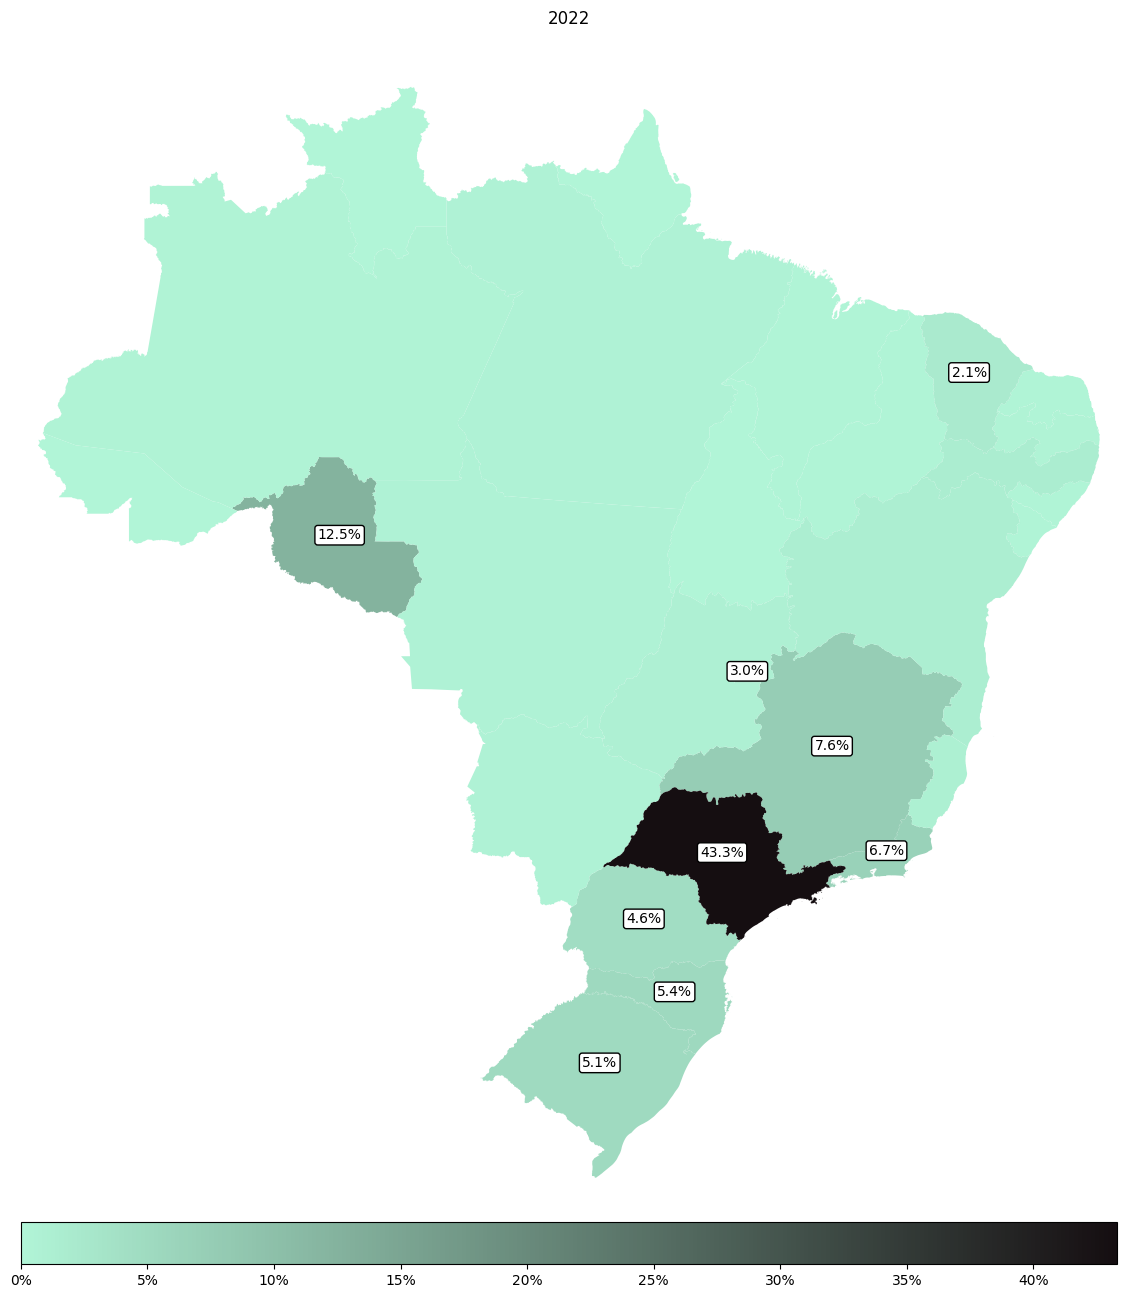

In [119]:
fig, (ax1) = plt.subplots(1, figsize = (16, 16))
fig.subplots_adjust(wspace = 0.05)

ax1.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax1.annotate(text = '{:.1f}%'.format(x['perc_mulheres_2022']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_mulheres_2022'] >= 2 else '', axis = 1)


df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_mulheres_2022', ax = ax1)

divider = make_axes_locatable(ax1)
cax1 = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax1.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_mulheres_2022'].max())), 
                                   cax1, orientation = "horizontal", format = lambda x, _: f"{x:.0f}%")

ax1.set_axis_off()

ax1.title.set_text('2022')

fig.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/map_qnt_mulheres.png", dpi = 300)

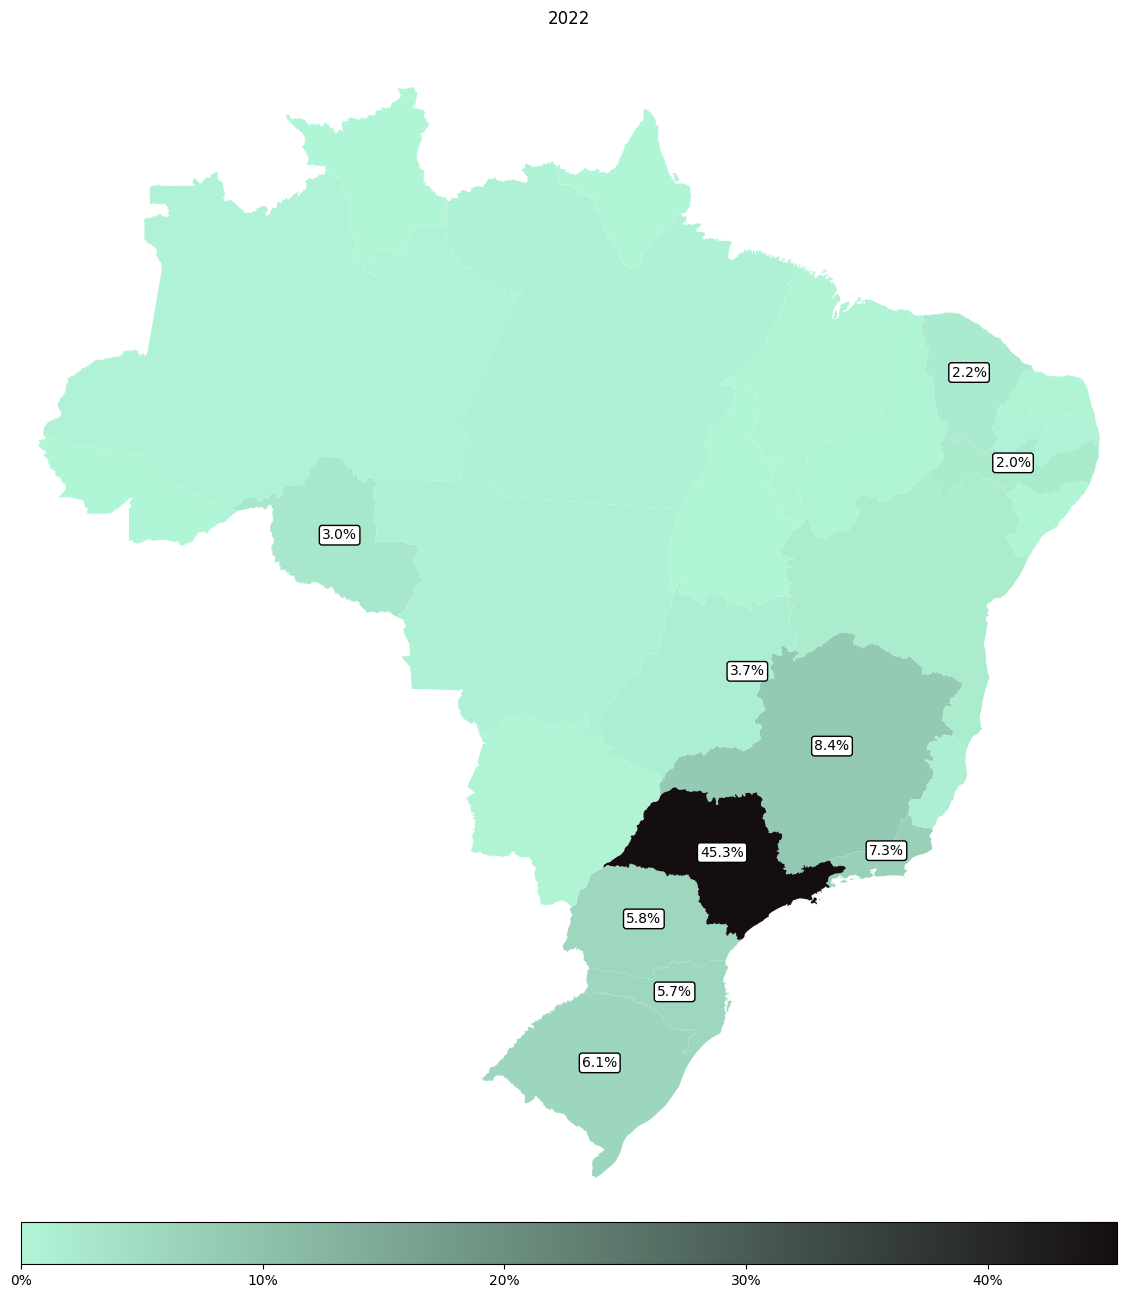

In [120]:
fig, (ax2) = plt.subplots(1, figsize = (16, 16))
fig.subplots_adjust(wspace = 0.05)

ax2.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax2.annotate(text = '{:.1f}%'.format(x['perc_homens_2022']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .2", fc = "1")) 
                        if x['perc_homens_2022'] >= 2 else '', axis = 1)

df_br_map.plot(cmap = cor_mapa_qnt, column = 'perc_homens_2022', ax = ax2)

divider = make_axes_locatable(ax2)
cax2 = divider.append_axes("bottom", size="3.5%", pad=-0.1)

cax2.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_qnt, 
                                   norm = plt.Normalize(vmin = 0, vmax = df_br_map['perc_homens_2022'].max())), 
                                   cax2, orientation = "horizontal", format=lambda x, _: f"{x:.0f}%")


ax2.set_axis_off()

ax2.title.set_text('2022')

fig.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/map_qnt_homens.png", dpi = 300)

In [121]:
# Tabela principal para mediana e diferença salarial:
RAIS_GERAL_2022_MEDIANA = pd.crosstab(RAIS_GERAL_2022["UF"], RAIS_GERAL_2022["Sexo"].replace(sexo), values = RAIS_GERAL_2022.Remuneração, aggfunc = 'median')
RAIS_GERAL_2022_MEDIANA.insert(2, "Diferença Salarial", ((RAIS_GERAL_2022_MEDIANA["Fem."] - RAIS_GERAL_2022_MEDIANA["Masc."]) / RAIS_GERAL_2022_MEDIANA["Masc."]) * 100)

RAIS_GERAL_2022_MEDIANA.head()

Sexo,Fem.,Masc.,Diferença Salarial
UF,,,
AC,"3,663.62","3,376.45",8.51
AL,"3,152.91","3,028.24",4.12
AM,"5,225.89","5,481.60",-4.66
AP,"3,408.31","3,438.85",-0.89
BA,"3,285.42","3,604.27",-8.85


In [122]:
RAIS_GERAL_2022_MEDIANA["Ano"] = "2022"

In [123]:
def teste_hipotese(first_data, second_data, confidence_interval):
    from scipy.stats import mannwhitneyu 
    
    stat, p_valor = mannwhitneyu(first_data, second_data, alternative = 'less')
    
    if p_valor <= confidence_interval:
        return stat, p_valor, 'Medianas estatisticamente diferentes', ''
    else:
        return stat, p_valor, 'Medianas estatisticamente iguais', '*'

In [124]:
TESTE_HIP_2022 = pd.DataFrame(columns = ['Estat. Mann-Whitney', 'pValor', 'Resultado Estat.', 'sigla', 'result_estat'])

list_uf = RAIS_GERAL_2022['UF'].value_counts().index.to_list()

for uf in list_uf:
    df1 = RAIS_GERAL_2022.query("Sexo == 1").query("UF == '{}'".format(uf)).Remuneração
    df2 = RAIS_GERAL_2022.query("Sexo == 2").query("UF == '{}'".format(uf)).Remuneração

    mean1 = df1.median()
    mean2 = df2.median()

    if mean1 < mean2:
        stat, p, result, result_estat = teste_hipotese(df1, df2, nivel_confianca)
    else:
        stat, p, result, result_estat = teste_hipotese(df2, df1, nivel_confianca)
    
    TESTE_HIP_2022.loc[uf] = [str(stat), '0.01 > {:.5f}...'.format(p), result, uf, result_estat]

RAIS_GERAL_2022_HIP = pd.merge(RAIS_GERAL_2022_MEDIANA, TESTE_HIP_2022, left_index=True, right_index=True)
RAIS_GERAL_2022_HIP.drop('Diferença Salarial', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Ano', inplace=True, axis=1)

RAIS_GERAL_2022_HIP.head(30)

,Fem.,Masc.,Estat. Mann-Whitney,pValor,Resultado Estat.,sigla,result_estat
AC,"3,663.62","3,376.45",10762.0,0.01 > 0.40432...,Medianas estatisticamente iguais,AC,*
AL,"3,152.91","3,028.24",372819.5,0.01 > 0.41830...,Medianas estatisticamente iguais,AL,*
AM,"5,225.89","5,481.60",1931827.0,0.01 > 0.01913...,Medianas estatisticamente iguais,AM,*
AP,"3,408.31","3,438.85",24330.0,0.01 > 0.02230...,Medianas estatisticamente iguais,AP,*
BA,"3,285.42","3,604.27",13873862.5,0.01 > 0.00001...,Medianas estatisticamente diferentes,BA,
CE,"3,101.60","3,870.15",21693673.5,0.01 > 0.00000...,Medianas estatisticamente diferentes,CE,
DF,"8,863.23","9,625.66",57971283.0,0.01 > 0.00016...,Medianas estatisticamente diferentes,DF,
ES,"4,338.80","4,698.70",7800053.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,ES,
GO,"3,407.25","3,999.27",6980111.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,GO,
MA,"2,029.22","2,580.21",573431.0,0.01 > 0.00000...,Medianas estatisticamente diferentes,MA,


In [125]:
# Tabela principal para teste estatistico :
RAIS_GERAL_2022_HIP.reset_index(inplace = True)
RAIS_GERAL_2022_HIP.drop('Fem.', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Masc.', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Estat. Mann-Whitney', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('pValor', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('Resultado Estat.', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.drop('index', inplace=True, axis=1)
RAIS_GERAL_2022_HIP.rename(columns = {'result_estat':'result_estat_2022'}, inplace = True)
df_br_map = df_br_map.merge(RAIS_GERAL_2022_HIP, how = 'inner', on = 'sigla')

In [126]:
cor_mapa_dif_2022 = mcl.LinearSegmentedColormap.from_list(name = 'Oranges2', colors = ['#B1F5D7', '#A5E6CA', '#150E11'], N = 256)

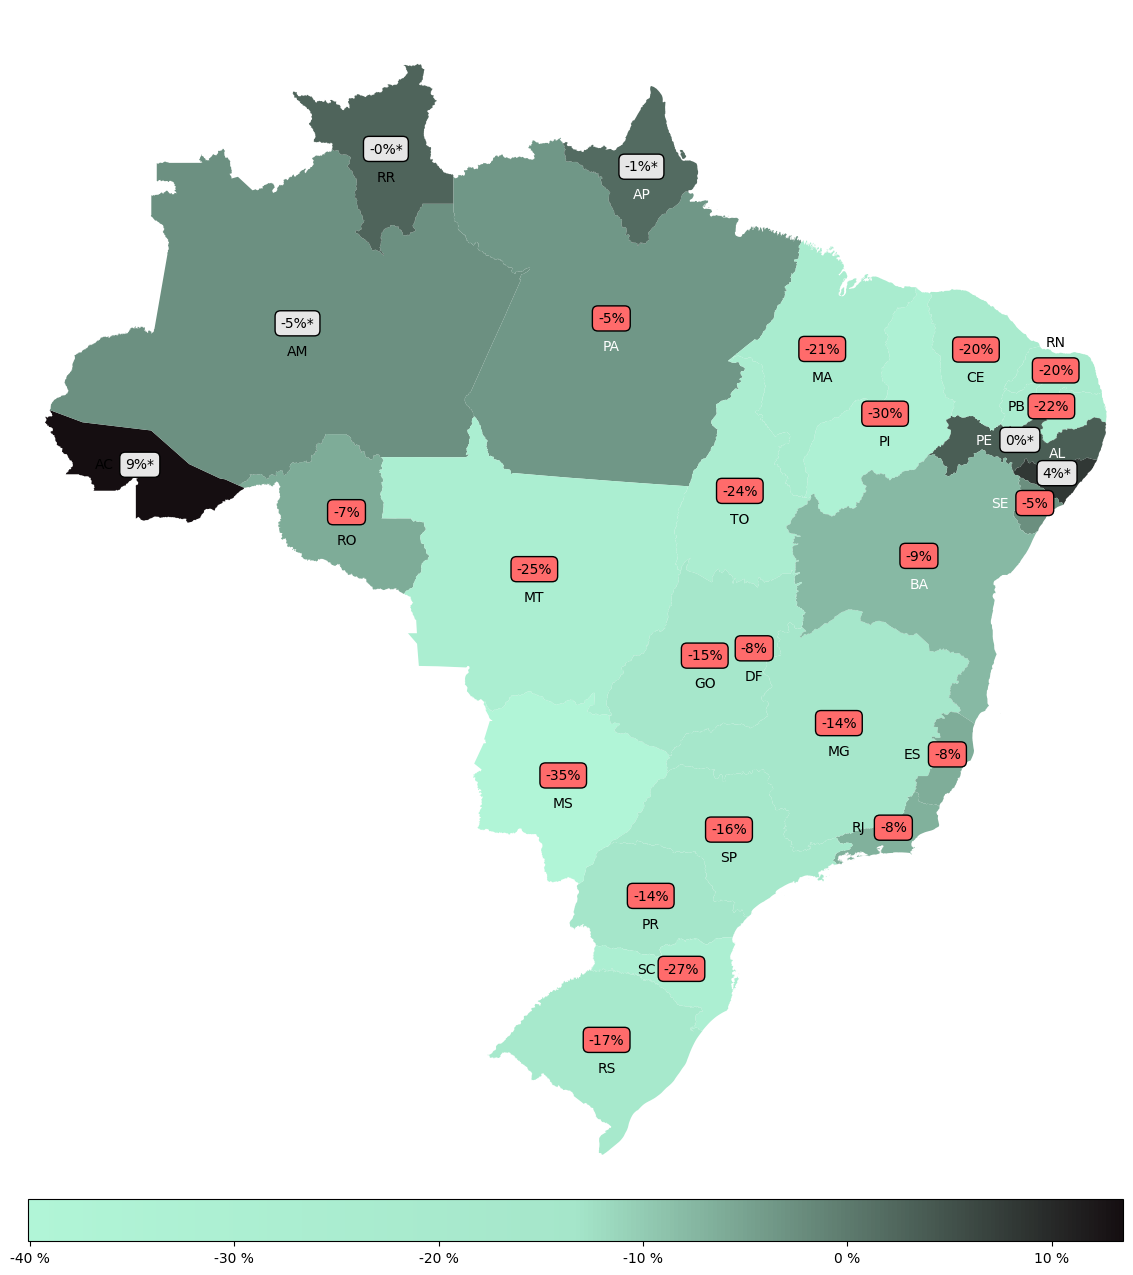

In [127]:
fig, ax = plt.subplots(1, 1, figsize = (20, 16))

ax.set_xlim(xlim_total_esquerda, xlim_total_direita)

df_br_map.apply(lambda x: ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2022'], x['result_estat_2022']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                       ha='center', bbox = dict(boxstyle = "round,pad = .4", fc="0.9"))
                        if x['result_estat_2022'] == '*' else
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2022'], x['result_estat_2022']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FFFE66', boxstyle = "round,pad = .4"))
                        if x['dif_salarial_mediano_2022'] >= 0 else 
                                ax.annotate(text = '{:.0f}%{}'.format(x['dif_salarial_mediano_2022'], x['result_estat_2022']), 
                                            xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]), 
                                            ha='center', bbox = dict(facecolor = '#FF6B6B', boxstyle = "round,pad = .4"))
                , axis = 1)

df_br_map.plot(cmap = cor_mapa_dif_2022, column = 'dif_salarial_mediano_2022', ax = ax)

divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="3.5%", pad=-0.1)
cax.xaxis.set_ticks_position("bottom")

fig.colorbar(plt.cm.ScalarMappable(cmap = cor_mapa_dif_2022, 
                                   norm = plt.Normalize(vmin = df_br_map['dif_salarial_mediano_2022'].min()-5, vmax = df_br_map['dif_salarial_mediano_2022'].max()+5)), 
                                   cax, orientation = "horizontal", format = lambda x, _: f"{x:.0f} %")

ax.set_axis_off()

df_br_map.apply(lambda x: ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'SE') | (x['sigla'] == 'PE')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0]-1.3, x['centroid'].coords[0][1]), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'AC') | (x['sigla'] == 'RJ') | (x['sigla'] == 'ES') |
                            (x['sigla'] == 'PB') | (x['sigla'] == 'SC')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+.7), 
                                       ha='center', color = 'white')
                        if (x['sigla'] == 'AL') else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]+1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RN')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                        if ((x['sigla'] == 'RR') | (x['sigla'] == 'MS')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'white')
                        if ((x['sigla'] == 'PA') | (x['sigla'] == 'BA') | (x['sigla'] == 'AP')) else
                                ax.annotate(text = '{}'.format(x['sigla']), 
                                       xy = (x['centroid'].coords[0][0], x['centroid'].coords[0][1]-1), 
                                       ha='center', color = 'black')
                                       , axis = 1)

fig.savefig("C:/Users/victo/2022/estagio/estagio/data/figures/png/map_dif_mediana_2022.png", dpi = 300)